In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%config Completer.use_jedi = False

In [3]:
from create_hdf_dataset import *

# define path to wav files and output path for hdf files

In [4]:
path2wavs = '/media/songbird/datapartition/wav_files'

out_path = '/media/songbird/datapartition/mdgan_training_input_with_age_HDF/'

# create individual bird hdfs

In [5]:
create_hdfs(path2wavs, out_path, extention='SAP_allfiles', extention2 = 'songs', 
                downsample_factor = 2, nfft = 256)


 ..... bird is r15s12 ....

..... bird r15s12 finished in 1795.89 secs.....

 ..... bird is r15y2 ....

..... bird r15y2 finished in 1325.51 secs.....

 ..... bird is p20r16 ....

..... bird p20r16 finished in 1586.10 secs.....

 ..... bird is r15y5 ....

..... bird r15y5 finished in 1720.69 secs.....

 ..... bird is g20r15 ....

..... bird g20r15 finished in 687.07 secs.....


# explore one birds file

 load one hdf file

In [33]:
birdfile = h5py.File(join(out_path, 'b7r16'),'r')

list some data folders for this bird

In [37]:
list(birdfile.keys())[-5:]

['2011-06-19', '2011-06-20', '2011-06-21', '2011-06-22', '2011-06-23']

list some wav files for one folder

In [38]:
list(birdfile['2011-06-23'].keys())[-5:]

['b7r16U-f00883-2011-6-23-16-44-1.wav_51',
 'b7r16U-f00884-2011-6-23-16-44-1.wav_51',
 'b7r16U-f00884-2011-6-23-16-44-2.wav_51',
 'b7r16U-f00885-2011-6-23-16-44-1.wav_51',
 'b7r16U-f00886-2011-6-23-16-44-1.wav_51']

# plot a spectrogram

In [40]:
S = np.array(birdfile['/2011-06-23/b7r16U-f00883-2011-6-23-16-44-1.wav_51'])
S.shape

(129, 400, 2)

In [41]:
S = transform(S)

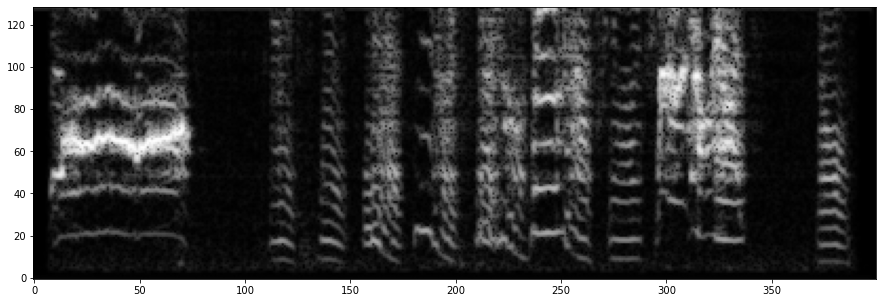

In [46]:
plt.figure(figsize = (20,5))
plt.imshow(rescale_spectrogram(S), cmap = 'gray', origin='lower')
plt.show()

In [43]:
import matplotlib.pyplot as plt

def rescale_spectrogram(s):
    ''' Just to make a 
        brighter spectrogram     
    '''
    if np.min(s) < 0:
        s = s - np.min(s) 
    s = s/np.max(s)
    return np.log(s+0.01)


def from_polar(image):
    ''' Get complex spectrogram from polar coordinate '''
    return image[:, :, 0]*np.cos(image[:, :, 1]) + 1j*image[:,:,0]*np.sin(image[:,:,1])


def transform(im):
    """
    This function should be used to transform data into the desired format for the network.
    inverse transoform should be an inverse of this function
    """
    im = from_polar(im)
    im, phase = lc.magphase(im)
    im = np.log1p(im)
    return im

In [24]:
birdfile.close()

# make id lists

ID lists are used by the songbird_dataset class to select random spectrograms during training

In [5]:
out_path

'/media/songbird/datapartition/mdgan_training_input_with_age_HDF/'

In [7]:
id_list, age_weight_list, cnt = make_ID_list(out_path)

..... 0 of 14 birds indexed .....
..... 1 of 14 birds indexed .....
..... 2 of 14 birds indexed .....
..... 3 of 14 birds indexed .....
..... 4 of 14 birds indexed .....
..... 5 of 14 birds indexed .....
..... 6 of 14 birds indexed .....
..... 7 of 14 birds indexed .....
..... 8 of 14 birds indexed .....
..... 9 of 14 birds indexed .....
..... 10 of 14 birds indexed .....
..... 11 of 14 birds indexed .....
..... 12 of 14 birds indexed .....
..... 13 of 14 birds indexed .....


# split id lists into test and train

In [8]:
id_list_train, id_list_test = split_ids_train_test(id_list, train_test_ratio = 0.9)

# save id and age weight lists with pickle (only use pickle!)

In [11]:
import pickle

In [13]:
with open('/media/songbird/datapartition/id_list_train.pkl','wb') as f:
    pickle.dump(id_list_train, f, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('/media/songbird/datapartition/id_list_test.pkl','wb') as f:
    pickle.dump(id_list_test, f, protocol=pickle.HIGHEST_PROTOCOL)

In [14]:
age_weights_train = [ids['age_weight'] for ids in id_list_train]
age_weights_test = [ids['age_weight'] for ids in id_list_test]

In [15]:
with open('/media/songbird/datapartition/age_weights_training.pkl', 'wb') as f: 
    pickle.dump(age_weights_train, f, protocol=pickle.HIGHEST_PROTOCOL)
with open('/media/songbird/datapartition/age_weights_test.pkl', 'wb') as f: 
    pickle.dump(age_weights_test, f, protocol=pickle.HIGHEST_PROTOCOL)